In [3]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dir = '/content/drive/MyDrive/Dataset/dataset_heart_disesas/hungarian.data'
with open(dir, 'r', encoding='latin1') as file:
  line = [line.strip() for line in file]

line[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [6]:
lines = line
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)
df = pd.DataFrame.from_records(data)
df.tail()


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [8]:
df.replace('-9', np.nan, inplace=True)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,NaN,2,140,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,NaN,3,160,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,NaN,2,130,...,NaN,NaN,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,NaN,4,138,...,2,NaN,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,NaN,3,150,...,1,NaN,1,1,1,1,1,-9.,-9.,name


In [9]:
selected_columns = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'num'
}
# Membuat DataFrame baru hanya dengan kolom-kolom yang dipilih
df = df[list(selected_columns.keys())]

# Mengganti nama kolom
df.rename(columns=selected_columns, inplace=True)

# Menampilkan DataFrame hasil
print(df.head())

  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope   ca thal  \
0  40   1  2      140  289   0       0     172     0       0   NaN  NaN  NaN   
1  49   0  3      160  180   0       0     156     0       1     2  NaN  NaN   
2  37   1  2      130  283   0       1      98     0       0   NaN  NaN  NaN   
3  48   0  4      138  214   0       0     108     1     1.5     2  NaN  NaN   
4  54   1  3      150  NaN   0       0     122     0       0   NaN  NaN  NaN   

  num  
0   0  
1   1  
2   0  
3   3  
4   0  


<ipython-input-9-07ea06a8ba45>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=selected_columns, inplace=True)


In [10]:
df['age'] = df['age'].astype(str).astype(float)
df['sex'] = df['sex'].astype(str).astype(float)
df['cp'] = df['cp'].astype(str).astype(float)
df['trestbps'] = df['trestbps'].astype(str).astype(float)
df['chol'] = df['chol'].astype(str).astype(float)
df['fbs'] = df['fbs'].astype(str).astype(float)
df['restecg'] = df['restecg'].astype(str).astype(float)
df['thalach'] = df['thalach'].astype(str).astype(float)
df['exang'] = df['exang'].astype(str).astype(float)
df['oldpeak'] = df['oldpeak'].astype(str).astype(float)
df['slope'] = df['slope'].astype(str).astype(float)
df['ca'] = df['ca'].astype(str).astype(float)
df['thal'] = df['thal'].astype(str).astype(float)
df['num'] = df['num'].astype(str).astype(float)

<ipython-input-10-5e480ede8125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(str).astype(float)
<ipython-input-10-5e480ede8125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].astype(str).astype(float)
<ipython-input-10-5e480ede8125>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [11]:
df.replace("?", np.nan, inplace= True)

df.head()

<ipython-input-11-1f056b5f0591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?", np.nan, inplace= True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [12]:
df.isnull().values.any()

True

In [13]:
df.loc[:, df.isnull().any()].columns

Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

In [14]:
median_value=df['trestbps'].median()
df['trestbps']=df['trestbps'].fillna(median_value)

median_value=df['chol'].median()
df['chol']=df['chol'].fillna(median_value)

median_value=df['fbs'].median()
df['fbs']=df['fbs'].fillna(median_value)

median_value=df['restecg'].median()
df['restecg']=df['restecg'].fillna(median_value)

median_value=df['thalach'].median()
df['thalach']=df['thalach'].fillna(median_value)

median_value=df['exang'].median()
df['exang']=df['exang'].fillna(median_value)

median_value=df['slope'].median()
df['slope']=df['slope'].fillna(median_value)

median_value=df['ca'].median()
df['ca']=df['ca'].fillna(median_value)

median_value=df['thal'].median()
df['thal']=df['thal'].fillna(median_value)

In [15]:
df.isnull().values.any()

False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  num       294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


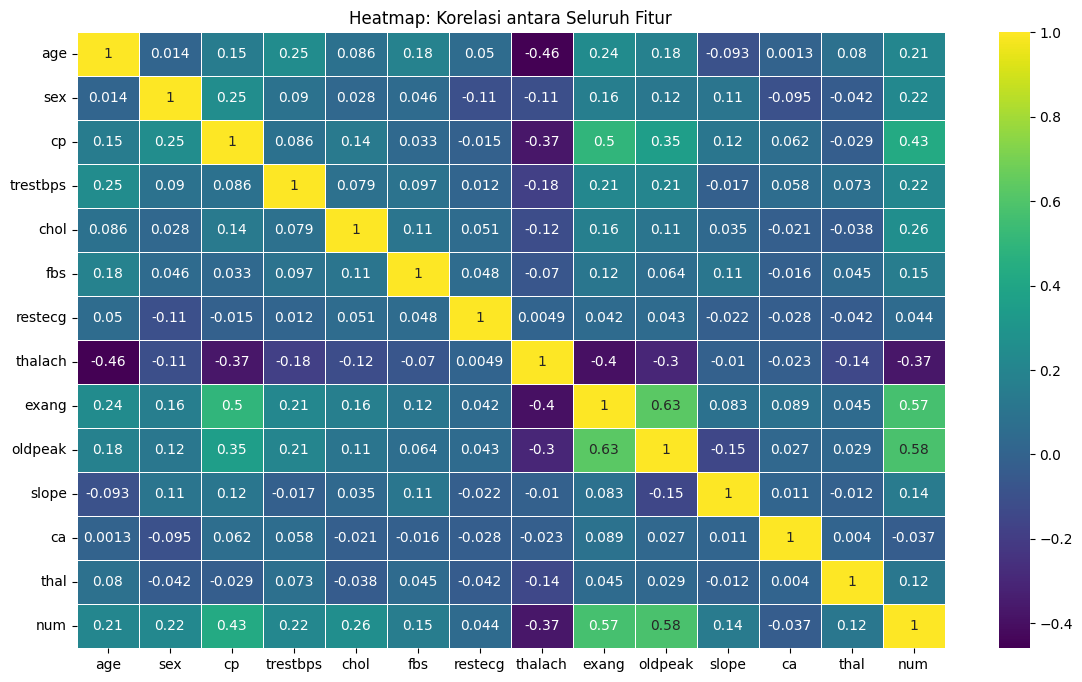

In [17]:
    corr_matrix = df.corr()
    plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5)
    plt.title('Heatmap: Korelasi antara Seluruh Fitur')
    plt.show()

In [18]:
y = df['num']
x = df.drop('num', axis=1)

In [19]:
y.head()

0    0.0
1    1.0
2    0.0
3    3.0
4    0.0
Name: num, dtype: float64

In [20]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,0.0,6.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,0.0,6.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,0.0,6.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,0.0,6.0
4,54.0,1.0,3.0,150.0,243.0,0.0,0.0,122.0,0.0,0.0,2.0,0.0,6.0


In [21]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada training set
smote = SMOTE(random_state=42)
# Check the shape of X and y before applying SMOTE
print("Shape of X before SMOTE:", x.shape)
print("Shape of y before SMOTE:", y.shape)
x_res, y_res = smote.fit_resample(x, y)

# Tampilkan hasil setelah SMOTE
print("Jumlah sampel sebelum SMOTE:", y.shape)
print("Jumlah sampel setelah SMOTE:", x_res.shape)

Shape of X before SMOTE: (294, 13)
Shape of y before SMOTE: (294,)
Jumlah sampel sebelum SMOTE: (294,)
Jumlah sampel setelah SMOTE: (940, 13)


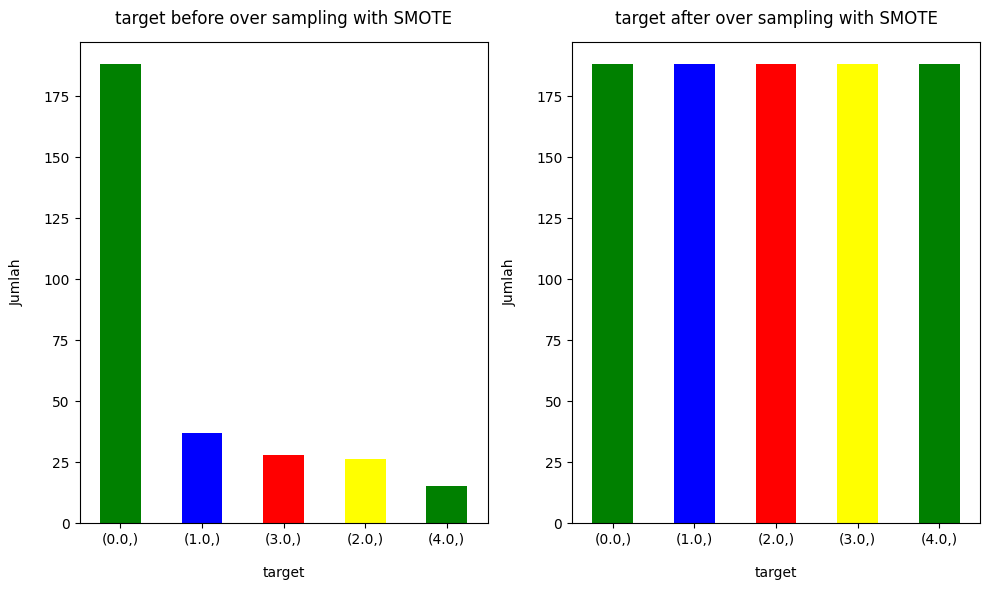

In [22]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.xlabel("target", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("target before over sampling with SMOTE", y=1.02)
plt.xticks(rotation=0);


new_df2 = pd.DataFrame(data=y_res)

plt.subplot(1, 2, 2)
new_df2.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow'])
plt.xlabel("target", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("target after over sampling with SMOTE", y=1.02)
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Mengubah DataFrame menjadi array NumPy
x = x_res.values
y = y_res.values

# membagi data menjadi data training dan data testing dengan perbandingan 80:20
# Random state digunakan untuk mengatur agar pembagian data menjadi sama setiap kali dijalankan (dapat diisi dengan angka berapapun)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


# menampilkan ukuran data training dan data testing
trainRatio = round(x_train.shape[0]/len(df), 2)*100
testRatio = round(x_test.shape[0]/len(df), 2)*100

print(f'Train set: {x_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {x_test.shape[0]} ({testRatio}%)')

Train set: 752 (256.0%)
Test set: 188 (64.0%)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# inisialisasi model
rf = RandomForestClassifier(random_state=123)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

# menentukan parameter yang akan dicoba
rfParams = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}
knnParams = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}
treeParams = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# mencari parameter terbaik
rfRandom = RandomizedSearchCV(rf, rfParams, random_state=123, n_jobs=-1)
knnRandom = RandomizedSearchCV(knn, knnParams, random_state=123, n_jobs=-1)
treeRandom = RandomizedSearchCV(tree, treeParams, random_state=123, n_jobs=-1)

rfRandom.fit(x_train, y_train)
knnRandom.fit(x_train, y_train)
treeRandom.fit(x_train, y_train)

# menampilkan parameter terbaik
print(f'Parameter terbaik: {rfRandom.best_params_}')
print(f'Parameter terbaik: {knnRandom.best_params_}')
print(f'Parameter terbaik: {treeRandom.best_params_}')


Parameter terbaik: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Parameter terbaik: {'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 10, 'algorithm': 'brute'}
Parameter terbaik: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy'}


In [25]:
# Lakukan prediksi pada data testing
rf_y_pred = rfRandom.predict(x_test)
knn_y_pred = knnRandom.predict(x_test)
tree_y_pred = treeRandom.predict(x_test)

# menampilkan skor akurasi dari model
#print(f'Skor Akurasi RF: {rfRandom.score(x_test, y_test)* 100:.2f}%')
#print(f'Skor Akurasi KNN: {knnRandom.score(x_test, y_test)* 100:.2f}%')
#print(f'Skor Akurasi Tree: {treeRandom.score(x_test, y_test)* 100:.2f}%')

#menampilkan akurasi presisi recall skor dari model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Akurasi rf: {rf_accuracy * 100:.2f}%")
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Akurasi knn: {knn_accuracy * 100:.2f}%")
tree_accuracy = accuracy_score(y_test, tree_y_pred)
print(f"Akurasi tree: {tree_accuracy * 100:.2f}%")

#menampilkan presisi recall skor dari model
rf_precision = precision_score(y_test, rf_y_pred, average='macro')
print(f"Presisi rf: {rf_precision * 100:.2f}%")
knn_precision = precision_score(y_test, knn_y_pred, average='macro')
print(f"Presisi knn: {knn_precision * 100:.2f}%")
tree_precision = precision_score(y_test, tree_y_pred, average='macro')
print(f"Presisi tree: {tree_precision * 100:.2f}%")

#menampilkan recall skor dari model
rf_recall = recall_score(y_test, rf_y_pred, average='macro')
print(f"Recall rf: {rf_recall * 100:.2f}%")
knn_recall = recall_score(y_test, knn_y_pred, average='macro')
print(f"Recall knn: {knn_recall * 100:.2f}%")
tree_recall = recall_score(y_test, tree_y_pred, average='macro')
print(f"Recall tree: {tree_recall * 100:.2f}%")

Akurasi rf: 90.96%
Akurasi knn: 80.32%
Akurasi tree: 81.91%
Presisi rf: 91.05%
Presisi knn: 81.98%
Presisi tree: 82.66%
Recall rf: 91.59%
Recall knn: 81.46%
Recall tree: 81.78%


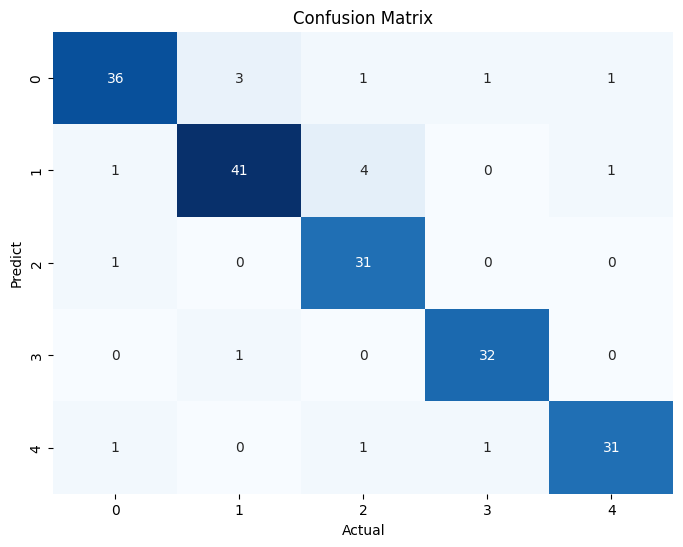

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Melakukan prediksi pada data testing
rf_y_pred = rfRandom.predict(x_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Confusion Matrix')
plt.show()

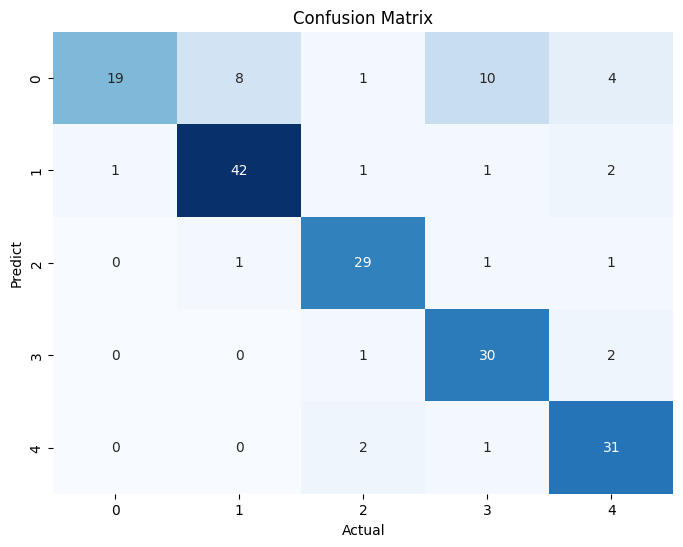

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Lakukan prediksi pada data testing
knn_y_pred = knnRandom.predict(x_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, knn_y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Confusion Matrix')
plt.show()

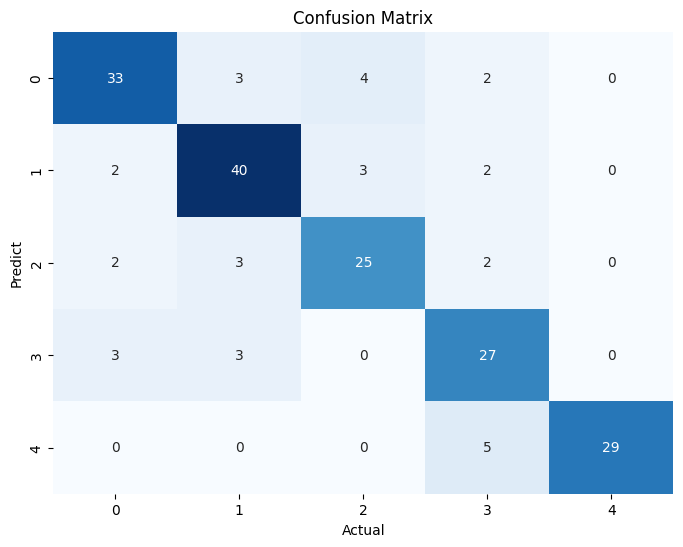

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Melakukan prediksi pada data testing
tree_y_pred = treeRandom.predict(x_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, tree_y_pred)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Confusion Matrix')
plt.show()

In [29]:
models = [
              ('Random Forest', rf_accuracy, rf_precision, rf_recall),
              ('K-Nearest Neighbors', knn_accuracy, knn_precision, knn_recall),
              ('Decision Tree', tree_accuracy, tree_precision, tree_recall),
         ]

In [30]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy', 'Precision', 'Recall'])
predict

,Model,Accuracy,Precision,Recall
0,Random Forest,0.909574,0.910519,0.915939
1,K-Nearest Neighbors,0.803191,0.819829,0.814621
2,Decision Tree,0.819149,0.826621,0.817830


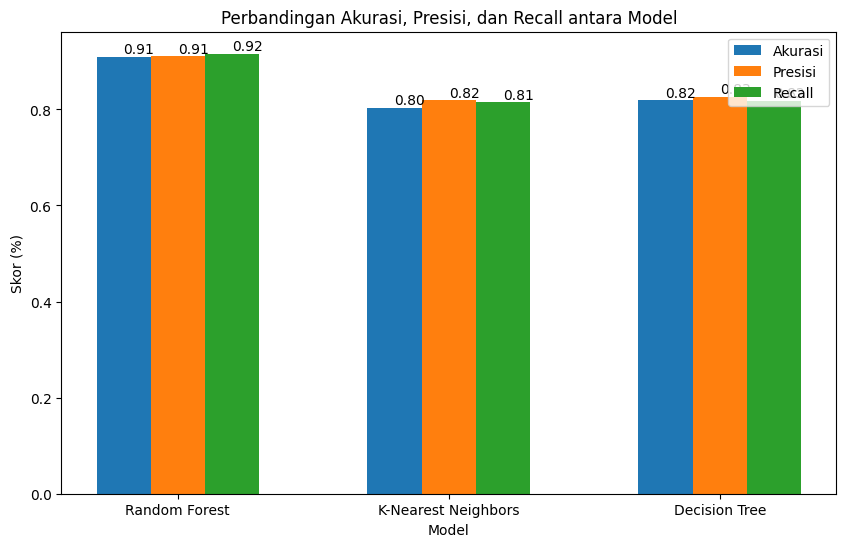

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk masing-masing model
models = [
    ('Random Forest', rf_accuracy, rf_precision, rf_recall),
    ('K-Nearest Neighbors', knn_accuracy, knn_precision, knn_recall),
    ('Decision Tree', tree_accuracy, tree_precision, tree_recall),
]

# Memisahkan data ke dalam list masing-masing
model_names, accuracies, precisions, recalls = zip(*models)

# Menentukan posisi untuk setiap grup bar
x = np.arange(len(model_names))  # Lokasi label pada sumbu x
width = 0.2  # Lebar tiap bar

# Membuat bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk Akurasi
bars1 = ax.bar(x - width, accuracies, width, label='Akurasi')

# Bar untuk Presisi
bars2 = ax.bar(x, precisions, width, label='Presisi')

# Bar untuk Recall
bars3 = ax.bar(x + width, recalls, width, label='Recall')

# Menambahkan label dan judul
ax.set_xlabel('Model')
ax.set_ylabel('Skor (%)')
ax.set_title('Perbandingan Akurasi, Presisi, dan Recall antara Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Menambahkan nilai di atas setiap bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Menampilkan plot
plt.show()


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,0.0,6.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,0.0,6.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,0.0,6.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,0.0,6.0,3.0
4,54.0,1.0,3.0,150.0,243.0,0.0,0.0,122.0,0.0,0.0,2.0,0.0,6.0,0.0


In [33]:
# refit the model with the best parameters into bestModel
rfModel = rfRandom.fit(x_train, y_train)
knnModel = knnRandom.fit(x_train, y_train)
treeModel = treeRandom.fit(x_train, y_train)

In [34]:
import os
import pickle

# Menyimpan model ke file pickle
with open('rfModel.pkl', 'wb') as file:
    pickle.dump(rfModel, file)

In [35]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [36]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('rfModel.pkl', 'rb') as file:
    model = pickle.load(file)

# Create a function to make predictions
def predict_heart_disease(inputs):
    prediction = model.predict([inputs])
    return prediction[0]

# Streamlit app
st.title("Heart Disease Prediction")

# Input features
age = st.number_input("Age", min_value=0, max_value=120, value=50)
sex = st.selectbox("Sex", options=[0, 1], format_func=lambda x: "Male" if x == 1 else "Female")
cp = st.selectbox("Chest Pain Type (cp)", options=[0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", min_value=0, max_value=300, value=120)
chol = st.number_input("Serum Cholestoral (chol)", min_value=0, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl (fbs)", options=[0, 1])
restecg = st.selectbox("Resting Electrocardiographic Results (restecg)", options=[0, 1, 2])
thalach = st.number_input("Maximum Heart Rate Achieved (thalach)", min_value=0, max_value=300, value=150)
exang = st.selectbox("Exercise Induced Angina (exang)", options=[0, 1])
oldpeak = st.number_input("ST Depression Induced by Exercise (oldpeak)", min_value=0.0, max_value=10.0, value=1.0, format="%.1f")
slope = st.selectbox("Slope of the Peak Exercise ST Segment (slope)", options=[0, 1, 2])
ca = st.selectbox("Number of Major Vessels (ca)", options=[0, 1, 2, 3])
thal = st.selectbox("Thalassemia (thal)", options=[0, 1, 2, 3])

# Make prediction
inputs = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])
if st.button("Predict"):
    result = predict_heart_disease(inputs)
    st.write(f"The model predicts: {'Presence of heart disease' if result == 1 else 'Absence of heart disease'}")


2024-07-12 14:31:14.333 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-07-12 14:31:14.335 Session state does not function when running a script without `streamlit run`
